In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
path = Path.cwd()
train = path/'data/facial-keypoints-detection/training.csv'

train_df = pd.read_csv(train)
train_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [4]:
train_df.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [5]:
train_df.iloc[0, -1].shape

AttributeError: 'str' object has no attribute 'shape'

In [8]:
raw = train_df.iloc[0, -1]

In [9]:
raw[:10]

'238 236 23'

In [10]:
img_arr = np.fromstring(raw, dtype=int, sep=' ').astype(np.int32)

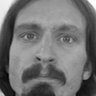

In [11]:
i = Image.fromarray(img_arr.reshape(-1, 96)).convert("L")
i

In [12]:
# extracting images from df rows
def str2img(row):
    img_arr = np.fromstring(row.Image, dtype='int32', sep=' ').astype(np.int32)
    img = Image.fromarray(img_arr.reshape(-1, 96)).convert('L')
    return img

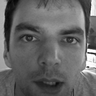

In [13]:
str2img(train_df.iloc[5])

In [14]:
train_df.iloc[0, :-1]

left_eye_center_x            66.033564
left_eye_center_y            39.002274
right_eye_center_x           30.227008
right_eye_center_y           36.421678
left_eye_inner_corner_x      59.582075
left_eye_inner_corner_y      39.647423
left_eye_outer_corner_x      73.130346
left_eye_outer_corner_y      39.969997
right_eye_inner_corner_x     36.356571
right_eye_inner_corner_y     37.389402
right_eye_outer_corner_x     23.452872
right_eye_outer_corner_y     37.389402
left_eyebrow_inner_end_x     56.953263
left_eyebrow_inner_end_y     29.033648
left_eyebrow_outer_end_x     80.227128
left_eyebrow_outer_end_y     32.228138
right_eyebrow_inner_end_x    40.227609
right_eyebrow_inner_end_y    29.002322
right_eyebrow_outer_end_x    16.356379
right_eyebrow_outer_end_y    29.647471
nose_tip_x                   44.420571
nose_tip_y                   57.066803
mouth_left_corner_x          61.195308
mouth_left_corner_y          79.970165
mouth_right_corner_x         28.614496
mouth_right_corner_y     

In [15]:
train_df.iloc[0, :-1].to_numpy().reshape(-1, 2)

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188, 39.6474225564],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.3889924812],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

In [16]:
train_df.iloc[0, :-1].to_numpy().reshape(-1, 2).astype(np.float64)

array([[66.03356391, 39.00227368],
       [30.22700752, 36.4216782 ],
       [59.58207519, 39.64742256],
       [73.13034586, 39.96999699],
       [36.35657143, 37.3894015 ],
       [23.45287218, 37.3894015 ],
       [56.95326316, 29.03364812],
       [80.22712782, 32.22813835],
       [40.22760902, 29.0023218 ],
       [16.35637895, 29.64747068],
       [44.42057143, 57.06680301],
       [61.19530827, 79.97016541],
       [28.61449624, 77.38899248],
       [43.3126015 , 72.93545865],
       [43.13070677, 84.48577444]])

In [62]:
def row2points(row):
    points = row[:-1].to_numpy().reshape(-1, 2).astype(int)
    return points

In [63]:
row2points(train_df.iloc[0,])

array([[66, 39],
       [30, 36],
       [59, 39],
       [73, 39],
       [36, 37],
       [23, 37],
       [56, 29],
       [80, 32],
       [40, 29],
       [16, 29],
       [44, 57],
       [61, 79],
       [28, 77],
       [43, 72],
       [43, 84]])

In [64]:
# remove nan
train_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [65]:
train_data = train_df.dropna()
train_data.shape

(2140, 31)

In [66]:
!ls

 data  'data preparation.ipynb'   Facial_Keypoints_Detection_01.ipynb


In [67]:
train_data.to_csv("data/sm_dataset.csv", index=False)

In [68]:
df = pd.read_csv("data/sm_dataset.csv")
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


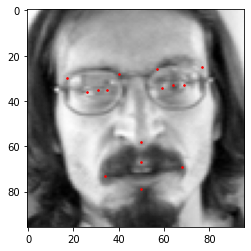

In [79]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.plot()
n = 100
image = str2img(df.iloc[n])
landmarks = row2points(df.iloc[n])
show_landmarks(image, landmarks)